## Logistic Regression

Also known as Logit Regression, it is often used to estimate probabilty of a clssification for an instance belong to. Instead of outputing a value like linear regression, it output the logistic of the result. (logistic == logit).



In this case a sigmoid function. 

$
\delta(t) =  \frac{1}{1 + e^-t}
$

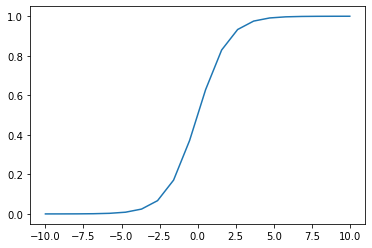

In [12]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.linspace(-10, 10, 20)
y = sigmoid(x)

plt.plot(x, y)

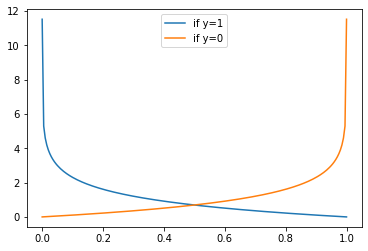

In [26]:
# plotting the cost function intuition, note that basically we want to y approach infinity for undesired result. 
# (ie. for class y = 1, small value if probability close to 1, but approches inifity when close to 0)

x = np.linspace(0.00001, 0.99999, 200)
plt.plot(x, -np.log(x), label='if y=1')
plt.plot(x, -np.log(1 - x), label='if y=0')
plt.legend()


## Logistic Regression Cost function (log loss) 

The cost function really should be

$
cost(h_\theta(x), y) = \frac{1}{m}\sum{i}^m \frac{1}/{2}(h_\theta(x^i) - y) ^ 2
$


However, $h_\theta(x)$ is not an linear equation, makes the cost function non-convex). To resolve the issue, we define the cost function as 


$
c(h_\theta(x), y) = -log(h_\theta(x)), \text{if y = 1}
$

$
c(h_\theta(x), y) = -log(1 - h_\theta(x)), \text{if y = 0}
$


The log loss for the whole dateset can therefore be treated as
$
J(\theta) = \frac{-1}{m}\sum{i=1}^m(y^ilog(h_\theta(x^i) + (1-y^i)log(1-h_\theta(x^i)))
$



Note that when p is positive, 0 will cancel out the ones and vise versa. Where p is the sigmoid of the linear function. (minus sign is moved to the front)

$
\Delta_J(\theta) = \frac{1}{m}\sum{i}^m(sigmoid(theta.dot(X)) - y).dot(X)
$

Detailed Derivation:
https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression

### Regularisation
Similarly logistic regression can also be regularised with l1 and l2 norms.

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
iris.keys()

X = iris['data'][:, 3:] # Petal Width
y = (iris["target"] == 2).astype(np.int)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc


log_reg = LogisticRegression(solver="lbfgs")
log_reg.fit(X, y)

y_pred = log_reg.predict(X)

print(confusion_matrix(y_pred, y))

[[98  4]
 [ 2 46]]


Text(0.5, 1.0, 'Decision Boundary')

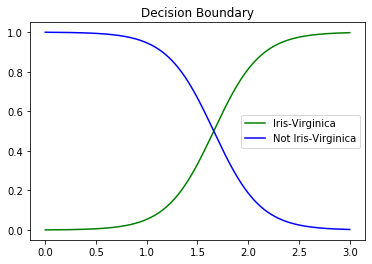

In [47]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) 
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b-', label = 'Not Iris-Virginica')
plt.legend()
plt.title("Decision Boundary")